# Create a dataset of cyclic molecules that were created in the original library but never sequenced

## Import + get amino acid dictionary

In [1]:
#generate in-library peptide sequences
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker
import random
from sequence_to_smiles import *
import itertools
from peptide_functions import *

In [2]:
linker_7 = 'CC(Cn)=O' #Kong et al. Nature biomedical engineering 2020
aa_df = pd.read_excel('AA_smiles_dict.xlsx')
aa_df = aa_df.set_index('1 letter')
aa_dict = dict(zip(aa_df.index,aa_df['full smiles']))

In [3]:
AAs = set(aa_df.drop(['Z','C']).index.values)
AAs

{'A',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y'}

In [4]:
merged_cleaned = pd.read_csv('merged_cleaned.csv')
merged_cleaned

,sequences_translated,R2,R3,R5_0%,R5_10%,R5_1%,R6_0%,R6_10%,R6_1%
0,TCVPEHCSCYRCP,34162.0,3512.0,177.0,419.0,157.0,124.0,26.0,NaN
1,KCFDCCYRCP,32186.0,36542.0,3268.0,30341.0,10822.0,556.0,12397.0,3494.0
2,YCSLCCYRCP,20320.0,13454.0,307.0,1106.0,307.0,2.0,320.0,1.0
3,FCLSCCYRCP,18614.0,14008.0,208.0,732.0,307.0,3.0,16.0,1.0
4,SCDCCYRCP,17209.0,9899.0,64.0,322.0,73.0,2.0,36.0,NaN
...,...,...,...,...,...,...,...,...,...
76152,FCGGFMCDMCYRCP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
76153,SCYRCYCAVPCF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
76154,SCYRCYCPIWRCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
76155,SCYRCYCSIRHCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Try stochastically creating peptides
### Turns out this is super inefficient and the vocabulary extraction process is super slow

In [7]:
num_peptides = len(merged_cleaned)*4
generated_peptides = pd.DataFrame(index=range(num_peptides),columns=['Sequence'],data=getPeptide(AAs,n_seq=num_peptides))
generated_peptides['smiles'] = smiles = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7) for seq in generated_peptides['Sequence']]
generated_peptides['smiles1'] = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7)[0] for seq in generated_peptides['Sequence']]
generated_peptides['smiles2'] = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7)[1] for seq in generated_peptides['Sequence']]
generated_peptides['smiles3'] = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7)[2] for seq in generated_peptides['Sequence']]
generated_peptides

,Sequence,smiles,smiles1,smiles2,smiles3
0,GCPCMCHPWCN,(N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C...,N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@...,N[C@@H]([H])C(=O)N[C@@H](CSCC(C4)=O)C(=O)N1[C@...,N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@...
1,VCPCVPACPCY,(N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N1[...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[...
2,ACTCVCWPCH,(N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...
3,KCVCGYCICN,(N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...
4,YCFAHGCPCGCQ,(N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C4)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...
...,...,...,...,...,...
304623,LCMCGCNGPELCS,(N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N...,N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[...,N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[...,N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[...
304624,KCWCVCWCY,(N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...
304625,KCNCICLCN,(N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...
304626,ECGWQCSCKFCV,(N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C3)=O)C(=O...,N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C3)=O)C(=O)...,N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C4)=O)C(=O)...,N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C3)=O)C(=O)...


In [8]:
generated_peptides = generated_peptides[~(generated_peptides['Sequence'].isin(merged_cleaned['sequences_translated']))]

In [9]:
generated_peptides.sort_values('Sequence')

,Sequence,smiles,smiles1,smiles2,smiles3
161843,ACACACACA,(N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...
24698,ACACACACV,(N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...
288811,ACACACAECW,(N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...
259199,ACACACDCT,(N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...
141873,ACACACEGRKVNCD,(N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H]...,N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]...
...,...,...,...,...,...
280393,YCYWFTCPCTCE,(N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C4)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...
159073,YCYWFVCNPCGCS,(N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C4)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...
244150,YCYWGCFTCFCE,(N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C4)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...
281751,YCYWMCKCRCI,(N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C4)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...


In [10]:
generated_peptides = np.hstack(generated_peptides[['smiles1','smiles2','smiles3']].values)
generated_peptides

array(['N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CC(=O)N)C(=O)O',
       'N[C@@H]([H])C(=O)N[C@@H](CSCC(C4)=O)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CS4)C(=O)N[C@@H](CC(=O)N)C(=O)O',
       'N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CS4)C(=O)N[C@@H](CC(=O)N)C(=O)O',
       ...,
       'N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CS3)C(=O)N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]([H])C(=O)N[C@@H](CS3)C(=O)N[C@@H]([C@]([H])(CC)C)C(=O)O',
       'N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@

In [16]:
generated_peptides = pd.DataFrame(generated_peptides)
# generated_peptides.to_csv('simulated_peptides.txt',header=None, index=None, sep=' ', mode='a')
generated_peptides.values

array([['N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CC(=O)N)C(=O)O'],
       ['N[C@@H]([H])C(=O)N[C@@H](CSCC(C4)=O)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CS4)C(=O)N[C@@H](CC(=O)N)C(=O)O'],
       ['N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CS3)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CS4)C(=O)N[C@@H](CC(=O)N)C(=O)O'],
       ...,
       ['N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CS3)C(=O)N[C@@H](C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H]([H])C(=O)N[C@@H](CS3)C(=O)N[C@@H]([C@]([H])(CC)C)C(=O)O'],
       ['N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C4)=O)C

In [17]:
real_peptides = pd.read_csv('/home/marcase/hgraph2graph/data/cyclic_peptides/cyclic_peptide_smiles.txt',header=None)
real_peptides = [i[0] for i in real_peptides.values]
generated_peptides = [i[0] for i in generated_peptides.values]

In [18]:
output = np.hstack((generated_peptides,real_peptides))
output = pd.DataFrame(output)
output

,0
0,N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@...
1,N[C@@H]([H])C(=O)N[C@@H](CSCC(C4)=O)C(=O)N1[C@...
2,N[C@@H]([H])C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[C@...
3,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1[...
4,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N1[...
...,...
1142350,N[C@@H](CO)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H...
1142351,N[C@@H](CO)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...
1142352,N[C@@H](CO)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...
1142353,N[C@@H](CO)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H...


In [19]:
pd.DataFrame(output).to_csv('all_data.txt', header=None, index=None, sep=' ', mode='a')

## Instead, generate the combinations of peptides that are possible to cover the cyclic peptide space completely and efficiently

In [5]:
#define parameters of generation
m=1
n=6
o=1
num_prolines=7

In [6]:
#get permutations of proline placements - test
combinations = ['X']*(m+n+o-num_prolines)+['P']*num_prolines
combinations = list(set(itertools.permutations(combinations))) #["".join([str(i) for i in string]) for string in list(set(itertools.permutations(combinations)))]
combinations = [list(i) for i in combinations]

#get AAs to fill X's
inter_AAs = random.sample(AAs,m+n+o)
random.shuffle(inter_AAs)

peptides=[]
#replace X with random AA's, skipping prolines
for c in range(len(combinations)):
    j=0
    for i in range(m+n+o):
        if combinations[c][i] != 'P':
            combinations[c][i] = inter_AAs[j]
            j+=1
combinations = ["".join([str(i) for i in c]) for c in combinations]
#add to list
[peptides.append(c) for c in combinations]
peptides

['PPPLPPPP',
 'PPLPPPPP',
 'PLPPPPPP',
 'LPPPPPPP',
 'PPPPPLPP',
 'PPPPPPLP',
 'PPPPPPPL',
 'PPPPLPPP']

In [7]:
getPeptideFramework(m,n,o,num_prolines) 

['PPPMPPPP',
 'PPMPPPPP',
 'PMPPPPPP',
 'MPPPPPPP',
 'PPPPPMPP',
 'PPPPPPMP',
 'PPPPPPPM',
 'PPPPMPPP']

In [8]:
m_opt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2]
n_opt = [0,1,1,1,1,1,1,2,2,2,2,2,3,3,3,4,1,1,1,1,1,1,2,2,2,2,3,3,2,2,2,3]
o_opt = [3,2,3,4,5,6,7,2,3,4,5,6,3,4,5,4,1,2,3,4,5,6,2,3,4,5,3,4,2,3,4,3]
combos = []
for i in range(len(m_opt)):
    permutations = list(set(itertools.permutations([m_opt[i],n_opt[i],o_opt[i]])))
    combos.append(permutations)
combos = flatten(combos)
combos

[(0, 3, 0),
 (3, 0, 0),
 (0, 0, 3),
 (1, 2, 0),
 (2, 1, 0),
 (0, 1, 2),
 (2, 0, 1),
 (0, 2, 1),
 (1, 0, 2),
 (1, 0, 3),
 (3, 1, 0),
 (0, 3, 1),
 (0, 1, 3),
 (1, 3, 0),
 (3, 0, 1),
 (4, 0, 1),
 (1, 0, 4),
 (1, 4, 0),
 (0, 4, 1),
 (4, 1, 0),
 (0, 1, 4),
 (5, 0, 1),
 (1, 0, 5),
 (1, 5, 0),
 (5, 1, 0),
 (0, 5, 1),
 (0, 1, 5),
 (0, 1, 6),
 (6, 0, 1),
 (6, 1, 0),
 (1, 0, 6),
 (1, 6, 0),
 (0, 6, 1),
 (0, 1, 7),
 (0, 7, 1),
 (7, 0, 1),
 (1, 7, 0),
 (1, 0, 7),
 (7, 1, 0),
 (2, 2, 0),
 (2, 0, 2),
 (0, 2, 2),
 (3, 0, 2),
 (3, 2, 0),
 (2, 0, 3),
 (0, 2, 3),
 (2, 3, 0),
 (0, 3, 2),
 (0, 4, 2),
 (2, 4, 0),
 (2, 0, 4),
 (4, 2, 0),
 (4, 0, 2),
 (0, 2, 4),
 (0, 5, 2),
 (2, 5, 0),
 (5, 0, 2),
 (5, 2, 0),
 (0, 2, 5),
 (2, 0, 5),
 (6, 2, 0),
 (0, 2, 6),
 (0, 6, 2),
 (2, 0, 6),
 (2, 6, 0),
 (6, 0, 2),
 (0, 3, 3),
 (3, 3, 0),
 (3, 0, 3),
 (0, 3, 4),
 (3, 4, 0),
 (3, 0, 4),
 (4, 0, 3),
 (0, 4, 3),
 (4, 3, 0),
 (3, 5, 0),
 (5, 3, 0),
 (0, 5, 3),
 (0, 3, 5),
 (5, 0, 3),
 (3, 0, 5),
 (4, 4, 0),
 (0, 4, 4),
 (4,

In [9]:
combos_prolines = []
for i,combo in enumerate(combos):
    combo_length = sum(combo)
    for j in range(combo_length+1):
        combos_prolines.append([combo[0],combo[1],combo[2],j])

combos_prolines[:10]

[[0, 3, 0, 0],
 [0, 3, 0, 1],
 [0, 3, 0, 2],
 [0, 3, 0, 3],
 [3, 0, 0, 0],
 [3, 0, 0, 1],
 [3, 0, 0, 2],
 [3, 0, 0, 3],
 [0, 0, 3, 0],
 [0, 0, 3, 1]]

In [10]:
dataset = []
for i,combo_prolines in enumerate(combos_prolines):
    dataset.append(getPeptideFramework(*combo_prolines))
# dataset=flatten(dataset)
dataset[:5]

[['GMD'], ['KSP', 'KPS', 'PKS'], ['PFP', 'FPP', 'PPF'], ['PPP'], ['SIK']]

In [11]:
inter_AA = flatten(dataset)[100]
m = combos_prolines[100][0]
n = combos_prolines[100][1]
o = combos_prolines[100][2]
sequence = "".join([str(i) for i in (random.sample(AAs,1) + ['C'] + [inter_AA[:m]]+['C']+[inter_AA[m:m+n]]+['C']+[inter_AA[m+n:m+n+o]] + ['C'] + random.sample(AAs,1))])
sequence

'FCCPCYPPCN'

In [12]:
full_dataset = []
for i,ds in enumerate(dataset):
    for j in range(len(ds)):
        m = combos_prolines[i][0]
        n = combos_prolines[i][1]
        o = combos_prolines[i][2]
        inter_AA = dataset[i][j]
        full_dataset.append(getFullPeptide(m,n,o,inter_AA))
    
output_data = pd.DataFrame(index=range(len(full_dataset)),columns=['Sequence'],data=full_dataset)
output_data

,Sequence
0,FCCGMDCCG
1,RCCKSPCCE
2,VCCKPSCCD
3,QCCPKSCCW
4,RCCPFPCCR
...,...
17419,QCPPPCPPHCPPCT
17420,TCPPPCPPPCHPCR
17421,LCPPPCPPPCPHCQ
17422,ECPPPCPHPCPPCA


In [13]:
#add C-term and N-term prolines
output_data.loc[len(output_data.index)] = ['PAPCCGSTCCPAP']

In [14]:
output_data['smiles'] = smiles = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7) for seq in output_data['Sequence']]
output_data['smiles1'] = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7)[0] for seq in output_data['Sequence']]
output_data['smiles2'] = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7)[1] for seq in output_data['Sequence']]
output_data['smiles3'] = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7)[2] for seq in output_data['Sequence']]
output_data

,Sequence,smiles,smiles1,smiles2,smiles3
0,FCCGMDCCG,(N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CSCC(C3)=O)C(=...,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CSCC(C3)=O)C(=O...,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CSCC(C4)=O)C(=O...,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CSCC(C3)=O)C(=O...
1,RCCKSPCCE,(N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C3)=O)C(...,N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C3)=O)C(=...,N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C4)=O)C(=...,N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C3)=O)C(=...
2,VCCKPSCCD,(N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...
3,QCCPKSCCW,(N[C@@H](CCC(=O)N)C(=O)N[C@@H](CSCC(C3)=O)C(=O...,N[C@@H](CCC(=O)N)C(=O)N[C@@H](CSCC(C3)=O)C(=O)...,N[C@@H](CCC(=O)N)C(=O)N[C@@H](CSCC(C4)=O)C(=O)...,N[C@@H](CCC(=O)N)C(=O)N[C@@H](CSCC(C3)=O)C(=O)...
4,RCCPFPCCR,(N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C3)=O)C(...,N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C3)=O)C(=...,N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C4)=O)C(=...,N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C3)=O)C(=...
...,...,...,...,...,...
17420,TCPPPCPPPCHPCR,(N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O...,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C4)=O)...,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...
17421,LCPPPCPPPCPHCQ,(N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N...,N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1...,N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N1...,N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N1...
17422,ECPPPCPHPCPPCA,(N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C3)=O)C(=O...,N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C3)=O)C(=O)...,N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C4)=O)C(=O)...,N[C@@H](CCC(=O)O)C(=O)N[C@@H](CSCC(C3)=O)C(=O)...
17423,WCPPPCPPPCPPCK,(N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CSC...,N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CSCC...,N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CSCC...,N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CSCC...


In [16]:
output_txt = np.hstack(output_data[['smiles1','smiles2','smiles3']].values)
pd.DataFrame(output_txt).to_csv('all_vocabulary_peptides.txt',header=None, index=None, sep=' ', mode='a')

## Create a realistic dataset that samples from the vocabulary (but favors peptides with fewer prolines)

Text(0, 0.5, 'Count')

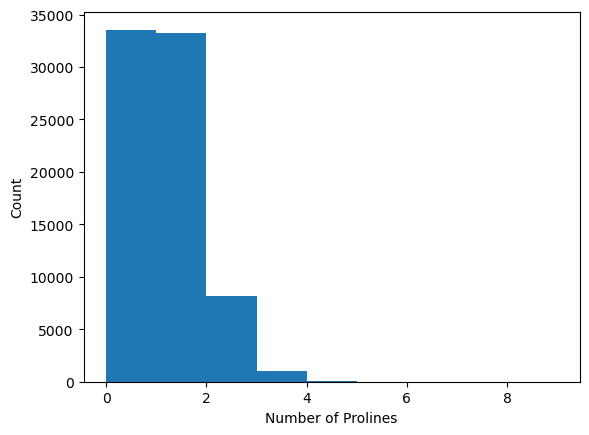

In [15]:
#how many prolines does the sorted library have?
n,bins,_ = plt.hist(merged_cleaned['sequences_translated'].str.count('P'),bins=range(10))
plt.xlabel('Number of Prolines')
plt.ylabel('Count')

In [19]:
#create distribution from dataset
keys = range(9)
values = n/sum(n)
proline_distribution = dict(zip(keys,values))
proline_distribution

{0: 0.44065548800504223,
 1: 0.4368475648988274,
 2: 0.1077379623672151,
 3: 0.013708523182373256,
 4: 0.0010373307772102366,
 5: 1.3130769331775148e-05,
 6: 0.0,
 7: 0.0,
 8: 0.0}

In [20]:
#sort patterns by proline count
combos_proline = np.array(combos_prolines)
combos_proline = combos_proline[combos_proline[:,-1].argsort()]
combos_proline

array([[0, 3, 0, 0],
       [3, 1, 2, 0],
       [2, 1, 2, 0],
       ...,
       [1, 5, 2, 8],
       [3, 0, 5, 8],
       [3, 3, 2, 8]])

In [21]:
#sample patterns by proline distribution
num_sampled_sequences = len(merged_cleaned)*3
sequences_to_sample = [int(np.round(value*num_sampled_sequences,0)) for value in proline_distribution.values()]
sequences_to_sample

[100677, 99807, 24615, 3132, 237, 3, 0, 0, 0]

In [22]:
peptides = []
for i in range(len(sequences_to_sample)):
    valid_combos = combos_proline[combos_proline[:,-1]==i]
    chosen_indices = np.random.choice(range(len(valid_combos)), size=sequences_to_sample[i], replace=True)
    chosen_patterns = [valid_combos[ch_idx] for ch_idx in chosen_indices]
    for j in range(len(chosen_patterns)):
        chp = chosen_patterns[j]
        inter_AAs = list(np.random.choice(list(AAs),chp[0]+chp[1]+chp[2]-chp[3]))
        [inter_AAs.append('P') for i in range(chp[3])]
        random.shuffle(inter_AAs)
        inter_AAs = flatten(inter_AAs)
        peptides.append(getFullPeptide(chp[0],chp[1],chp[2],"".join([i for i in inter_AAs]))) ##TODO: write a function that gives a full peptide sequence with a randomized proline

In [36]:
random.shuffle(peptides)
generated_peptides = pd.DataFrame(peptides,columns=['Sequence'])
print('before duplicate removal: ' + str(len(generated_peptides)))
generated_peptides=generated_peptides[~(generated_peptides['Sequence'].isin(merged_cleaned['sequences_translated']))]
print('after duplicate removal: ' + str(len(generated_peptides)))
generated_peptides

before duplicate removal: 228471
after duplicate removal: 228470


,Sequence
0,TCTACKISICSCK
1,QCDQCCISCS
2,WCLMPGCPPCCM
3,HCFCSCMCL
4,GCCAWCLKCE
...,...
228466,TCPPPCQCPADCG
228467,VCNCLHCNKCR
228468,YCFAPQMCVCCV
228469,NCLFCTCCA


## join the generated samples with the real samples to form a 3:1 fake:real dataset for pre-training

In [37]:
#get real peptides from dataset and rename column
real_peptides = merged_cleaned[['sequences_translated']]
real_peptides.columns = ['Sequence']
real_peptides

,Sequence
0,TCVPEHCSCYRCP
1,KCFDCCYRCP
2,YCSLCCYRCP
3,FCLSCCYRCP
4,SCDCCYRCP
...,...
76152,FCGGFMCDMCYRCP
76153,SCYRCYCAVPCF
76154,SCYRCYCPIWRCE
76155,SCYRCYCSIRHCE


In [38]:
#merge and change name to avoid confusion
real_peptides = real_peptides.append(generated_peptides, ignore_index=True)
all_peptides = real_peptides
all_peptides

,Sequence
0,TCVPEHCSCYRCP
1,KCFDCCYRCP
2,YCSLCCYRCP
3,FCLSCCYRCP
4,SCDCCYRCP
...,...
304622,TCPPPCQCPADCG
304623,VCNCLHCNKCR
304624,YCFAPQMCVCCV
304625,NCLFCTCCA


In [40]:
#get smiles of peptides
all_peptides['smiles'] = [getCrosslinkedSeq(getSmilesFromAA(seq),linker_7) for seq in all_peptides['Sequence']]
all_peptides['smiles1'] = all_peptides['smiles'].str[0]
all_peptides['smiles2'] = all_peptides['smiles'].str[1]
all_peptides['smiles3'] = all_peptides['smiles'].str[2]
#remove dataframe list
all_peptides.drop(columns='smiles',inplace=True)
all_peptides

,Sequence,smiles1,smiles2,smiles3
0,TCVPEHCSCYRCP,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C4)=O)...,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...
1,KCFDCCYRCP,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C...,N[C@@H](CCCCN)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...
2,YCSLCCYRCP,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C4)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...
3,FCLSCCYRCP,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CSCC(C3)=O)C(=O...,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CSCC(C4)=O)C(=O...,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CSCC(C3)=O)C(=O...
4,SCDCCYRCP,N[C@@H](CO)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...,N[C@@H](CO)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C@@H...,N[C@@H](CO)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...
...,...,...,...,...
304622,TCPPPCQCPADCG,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C4)=O)...,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...
304623,VCNCLHCNKCR,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[C...,N[C@@H](C(C)C)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C...
304624,YCFAPQMCVCCV,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C4)=O)C...,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...
304625,NCLFCTCCA,N[C@@H](CC(=O)N)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N...,N[C@@H](CC(=O)N)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N...,N[C@@H](CC(=O)N)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N...


In [41]:
#compress and save for preprocessing
all_peptides = np.hstack(all_peptides[['smiles1','smiles2','smiles3']].values)
all_peptides = pd.DataFrame(all_peptides)
all_peptides.to_csv('real-generated-1-3.txt',header=None, index=None, sep=' ', mode='a')

## split data into multiple sections for preprocessing

In [4]:
#split data
all_peptides = pd.read_csv('real-generated-1-3.txt',header=None)
all_peptides = all_peptides.sample(frac=1).reset_index(drop=True)
all_peptides

,0
0,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...
1,N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CSCC...
2,N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CSCC(C3)=O)C...
3,N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSCC(C4)=O)C(=...
4,N[C@@H]([C@]([H])(O)C)C(=O)N[C@@H](CSCC(C3)=O)...
...,...
1142347,N[C@@H]([C@]([H])(CC)C)C(=O)N[C@@H](CSCC(C4)=O...
1142348,N[C@@H](CO)C(=O)N[C@@H](CSCC(C3)=O)C(=O)N[C@@H...
1142349,N[C@@H]([C@]([H])(CC)C)C(=O)N[C@@H](CSCC(C4)=O...
1142350,N[C@@H](CC(C)C)C(=O)N[C@@H](CSCC(C4)=O)C(=O)N[...


In [11]:
len_df = len(all_peptides)
num_splits = 4
slice_length = int(np.around(len_df/num_splits,0))
for n in range(num_splits):
    df = all_peptides.iloc[n*slice_length:(n+1)*slice_length]
    print(len(df))
    df.to_csv('data_split_' + str(n) + '.txt',header=None, index=None, sep=' ', mode='a')

285588
285588
285588
285588


In [8]:
df

,0
